# 数据预处理

In [13]:
import numpy as np #导入NumPy
import pandas as pd #导入Pandas
df_member = pd.read_csv('易速鲜花会员留存.csv') #载入数据集

df_member['总消费'] = pd.to_numeric(df_member['总消费'], errors='coerce') #把总消费字段转换成数值字段
df_member['总消费'] = df_member['总消费'].fillna(0) #补充0值

# 把汉字转换成0、1值
# 使用赋值方式替代 inplace，避免 FutureWarning
df_member['已停付会费'] = df_member['已停付会费'].map({'是': 1, '否': 0})
df_member['性别'] = df_member['性别'].map({'女': 0, '男': 1})

# 其它的是、否字段转换成布尔型数据
binary_features = ['玫瑰套餐', '紫罗兰套餐', '郁金香套餐', 
                   '百合套餐', '康乃馨套餐', '胡姬花套餐', 
                   '生日套餐','情人节套餐']
for field in binary_features:
    df_member[field] = df_member[field] == '是'
    
# 分类字段哑变量
category_features = ['会员卡类型', '会费支付方式']
df_member = pd.get_dummies(df_member, drop_first=True, columns=category_features)
    
df_member

,用户码,性别,玫瑰套餐,紫罗兰套餐,郁金香套餐,百合套餐,康乃馨套餐,胡姬花套餐,生日套餐,情人节套餐,入会月数,平均月消费,总消费,已停付会费,会员卡类型_年卡,会员卡类型_月卡,会费支付方式_微信自动扣款,会费支付方式_手工转账,会费支付方式_花呗付款
0,1,0,True,True,False,True,False,True,True,False,9,65.60,593.30,0,True,False,False,True,False
1,2,1,False,False,False,False,False,False,False,True,9,59.90,542.40,0,False,True,False,True,False
2,3,1,False,False,False,False,True,False,False,False,4,73.90,280.85,1,False,True,False,False,False
3,4,1,True,False,False,True,True,False,True,True,13,98.00,1237.85,1,False,True,False,False,False
4,5,0,False,True,False,False,False,True,True,True,9,69.40,571.45,0,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,7039,0,False,False,True,False,False,True,False,False,13,55.15,742.90,0,True,False,False,True,False
7039,7040,1,False,False,False,True,False,False,False,False,2,50.30,92.75,0,False,True,False,True,False
7040,7041,1,True,False,False,False,False,False,False,True,22,85.10,1873.70,1,False,True,False,False,False
7041,7042,1,True,True,True,False,True,True,False,True,67,67.85,4627.65,0,False,False,False,True,False


## 构建特征集和标签集

In [14]:
X = df_member.drop(['用户码','已停付会费'], axis = 1) # 构建特征集，用户码字段属于无用特征
y = df_member.已停付会费.values # 构建标签集

## 拆分数据集

In [15]:
from sklearn.model_selection import train_test_split #导入train_test_split模块
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2) #拆分数据集

# 选择算法
## 逻辑回归模型，导入模型

In [16]:
from sklearn.linear_model import LogisticRegression #导入逻辑回归模型
lr = LogisticRegression() # lr,就代表是逻辑回归模型

## 训练模型

In [17]:
lr.fit(X_train,y_train) # fit,就相当于是梯度下降

/opt/homebrew/Caskroom/miniforge/base/envs/machine_learning/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:406: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

## 评估分数

In [18]:
print("SK-learn逻辑回归预测准确率{:.2f}%".format(lr.score(X_test,y_test)*100))

SK-learn逻辑回归预测准确率80.41%


## 预测结果

In [19]:
y_pred=lr.predict(X_test)
print("逻辑回归对测试集第一个用户的预测结果", y_pred[0])

逻辑回归对测试集第一个用户的预测结果 0


## 神经网络模型

In [20]:
#!pip install keras
#!pip install tensorflow

In [21]:
import keras # 导入Keras库
from keras.models import Sequential # 导入Keras序贯模型
from keras.layers import Dense # 导入Keras密集连接层
dnn = Sequential() # 创建一个序贯DNN模型
dnn.add(Dense(units=12, input_dim=17, activation = 'relu')) # 添加输入层
dnn.add(Dense(units=24, activation = 'relu')) # 添加隐层
dnn.add(Dense(units=1, activation = 'sigmoid')) # 添加输出层
dnn.summary() # 显示网络模型（这个语句不是必须的）
# 编译神经网络，指定优化器，损失函数，以及评估标准
dnn.compile(optimizer = 'RMSProp', #优化器
            loss = 'binary_crossentropy', #损失函数
            metrics = ['acc']) #评估标准

/opt/homebrew/Caskroom/miniforge/base/envs/machine_learning/lib/python3.11/site-packages/keras/src/layers/core/dense.py:106: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
2026-02-15 23:25:02.442344: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2026-02-15 23:25:02.442507: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2026-02-15 23:25:02.442511: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2026-02-15 23:25:02.442551: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2026-02-15 23:25:02.442564: I tensorflow/core/common_runtime/pluggable_device/pl

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 12)             │           216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 24)             │           312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 553 (2.16 KB)

 Trainable params: 553 (2.16 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
X_train.shape

(5634, 17)

In [24]:
X_train = np.asarray(X_train).astype(np.float32) # 转换为NumPy张量
X_test = np.asarray(X_test).astype(np.float32) # 转换为NumPy张量

X_train.dtype #X_train转换后的类型

dtype('float32')

In [25]:
history = dnn.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_split=0.2) #这里直接从训练集数据中拆分验证集，更方便

Epoch 1/30


2026-02-15 23:33:17.124113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - acc: 0.6816 - loss: 59.8965 - val_acc: 0.7542 - val_loss: 7.6863
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6414 - loss: 6.4723 - val_acc: 0.6930 - val_loss: 1.4585
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.6423 - loss: 5.9537 - val_acc: 0.7746 - val_loss: 10.7330
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.6514 - loss: 5.7450 - val_acc: 0.7720 - val_loss: 8.5546
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6603 - loss: 6.2048 - val_acc: 0.7693 - val_loss: 1.7489
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6692 - loss: 5.7142 - val_acc: 0.3097 - val_loss: 3.8183
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6594 - loss: 5.9284 - val_acc: 0.7746 - val_loss: 3.6071
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6840 - loss: 5.7555 - val_acc: 0.7755 - val_loss: 3.5255
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.6789 - loss: 5.4662 

In [26]:
import matplotlib.pyplot as plt #导入绘图工具
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'PingFang SC', 'Heiti TC']  # macOS 中文字体
def show_history(history): # 显示训练过程中的学习曲线
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    plt.figure(figsize=(12,4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show() 

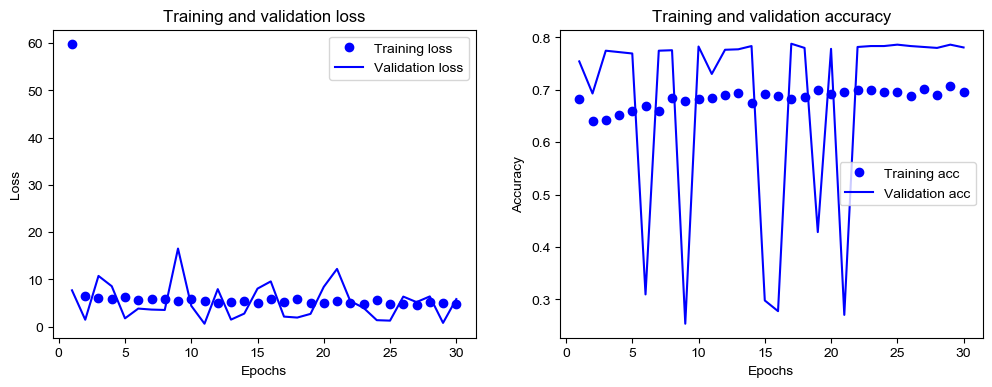

In [27]:
show_history(history) # 调用这个函数

In [28]:
result = dnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('DNN的测试准确率为',"{0:.2f}%".format(result[1]*100))

45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - acc: 0.7729 - loss: 6.3545
DNN的测试准确率为 77.29%


In [29]:
prediction = dnn.predict(X_test) #预测测试集的图片分类
print('第一个用户分类结果为:', np.argmax(prediction[0]))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
第一个用户分类结果为: 0


## 神经网络模型-归一化之后

In [30]:
from sklearn.preprocessing import MinMaxScaler #导入归一化缩放器
scaler = MinMaxScaler() #创建归一化缩放器
X_train = scaler.fit_transform(X_train) #拟合并转换训练集数据
X_test = scaler.transform(X_test) #转换测试集数据

Epoch 1/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.7635 - loss: 0.4814 - val_acc: 0.7862 - val_loss: 0.4599
Epoch 2/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7692 - loss: 0.4711 - val_acc: 0.7853 - val_loss: 0.4475
Epoch 3/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7721 - loss: 0.4636 - val_acc: 0.7924 - val_loss: 0.4379
Epoch 4/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7746 - loss: 0.4586 - val_acc: 0.7995 - val_loss: 0.4319
Epoch 5/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.7746 - loss: 0.4549 - val_acc: 0.7941 - val_loss: 0.4282
Epoch 6/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - acc: 0.7775 - loss: 0.4525 - val_acc: 0.8039 - val_loss: 0.4256
Epoch 7/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7790 - loss: 0.4501 - val_acc: 0.7995 - val_loss: 0.4224
Epoch 8/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7834 - loss: 0.4476 - val_acc: 0.7977 - val_loss: 0.4194
Epoch 9/30
71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - acc: 0.7841 - loss

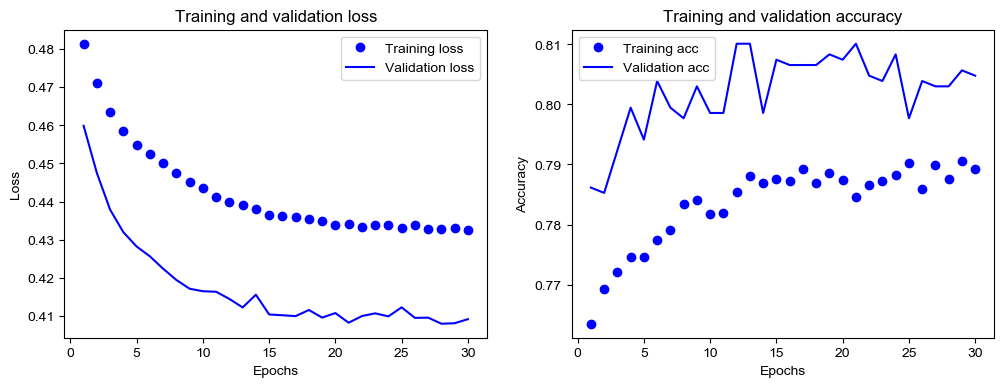

In [31]:
history = dnn.fit(X_train, y_train, # 指定训练集
                  epochs=30,        # 指定训练的轮次
                  batch_size=64,    # 指定数据批量
                  validation_split=0.2) #指定验证集,这里为了简化模型，直接用训练集数据
show_history(history) # 调用这个函数

In [32]:
result = dnn.evaluate(X_test, y_test) #评估测试集上的准确率
print('DNN（归一化之后）的测试准确率为',"{0:.2f}%".format(result[1]*100))

45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - acc: 0.8062 - loss: 0.4313
DNN（归一化之后）的测试准确率为 80.62%
